In [4]:
%matplotlib inline
import os, pickle, glob
import cv2
import re
import matplotlib
import numpy as np
import FileIO as fio
import Camera as camsolve
from matplotlib import pyplot as plt
from collections import defaultdict
plt.style.use("ggplot")

In [60]:
marker_names = ["ARIEL", "RBHD", "LBHD", "RFHD", "LFHD", "C7", "LBSH", "LFSH", "LUPA", "LELB", 
                "LIEL", "LWRE", "LOWR", "LIWR", "LOHAND", "LIHAND", "CLAV", "T10", "STRN", 
                "RFSH", "RBSH", "RUPA", "RELB", "RIEL", "RWRE", "RIWR", "ROWR", "RIHAND", 
                "ROHAND", "LFWT", "LBWT", "RFWT", "RBWT", "LMWT", "RMWT", "LHIP", "LKNE", "LKNI",
                "LSHN", "LHEL", "LANK", "LMT5", "LMT1", "LTOE", "RHIP", "RKNE", "RKNI", "RSHN",
                "RHEL", "RANK", "RMT5", "RMT1", "RTOE"]

In [160]:
repr(dict((name, ind) for ind, name in enumerate(marker_names)))

"{'ARIEL': 0, 'LMT1': 42, 'RKNI': 46, 'STRN': 18, 'LBHD': 2, 'ROWR': 26, 'LBWT': 30, 'RFHD': 3, 'RUPA': 21, 'RANK': 49, 'LUPA': 8, 'LHIP': 35, 'RMT1': 51, 'RTOE': 52, 'LBSH': 6, 'LOWR': 12, 'RBHD': 1, 'LSHN': 38, 'RSHN': 47, 'LKNI': 37, 'T10': 17, 'RHEL': 48, 'RMWT': 34, 'LFSH': 7, 'RIEL': 23, 'C7': 5, 'LKNE': 36, 'RFWT': 31, 'ROHAND': 28, 'RBWT': 32, 'RHIP': 44, 'LOHAND': 14, 'RIWR': 25, 'RIHAND': 27, 'RELB': 22, 'LTOE': 43, 'RBSH': 20, 'LANK': 40, 'LFHD': 4, 'LIEL': 10, 'LIWR': 13, 'LIHAND': 15, 'LELB': 9, 'RWRE': 24, 'LFWT': 29, 'LMWT': 33, 'LWRE': 11, 'RFSH': 19, 'LMT5': 41, 'CLAV': 16, 'RMT5': 50, 'LHEL': 39, 'RKNE': 45}"

In [6]:
def show_proj_on_img(ax, img, proj):
    ax.imshow(img)
    ax.plot(proj[:, 0], proj[:, 1], "b+", label="Ground truth")

In [91]:
root_dir = "/home/liyanc/Desktop/raid/scratch2/pose/processing/staging/20180831"
subj = "liyan"
takename = "action_00"
take_io = fio.ImgDirIO(root_dir, subj, takename)

In [84]:
cam_dict = {}
param_path = '/home/liyanc/Desktop/raid/scratch2/pose/processing/staging/meta_mid/cameras/20180831_liyan_camparams.pkl'
param_dict = fio.load_pkl(param_path)
for cam, param in param_dict.items():
    csolver = camsolve.CameraSolverNonlinear()
    csolver.load_params(param)
    cam_dict[cam] = csolver

In [85]:
marker_path = "/home/liyanc/Desktop/raid/scratch2/pose/processing/staging/meta_mid"
pkl_list = glob.glob("{:}/*.pkl".format(marker_path))

In [86]:
subj_take_file = defaultdict(dict)
ptn = re.compile("(action_\d{2})|(motion_\d{2})|(zw_static_\d{2})")
for f in glob.glob("{:}/*.pkl".format(marker_path)):
    fname = os.path.basename(f)
    sub = fname.split("_")[0]
    take = ptn.search(fname).group(0)
    subj_take_file[sub][take] = f

In [92]:
marker_dict = fio.load_pkl(subj_take_file[subj][takename], True)

In [139]:
curv_list = [marker_dict[mname]["curve"] for mname in marker_names]
max_len = max(c.shape[0] for c in curv_list)
curv_list = [np.pad(c, ((0, max_len - c.shape[0]), (0, 0)), "constant", constant_values=np.nan) for c in curv_list]
skel_curv = np.array(curv_list).transpose((1, 0, 2))

In [133]:
skel_curv.shape

(21053, 53, 3)

In [147]:
cam = "01"
t_c = 20

imgfile, imgts = take_io.get_imgfile_timestamp(cam)[t_c]
linear_img = cam_dict[cam].undistort_img(fio.imread_from_lz4(imgfile))

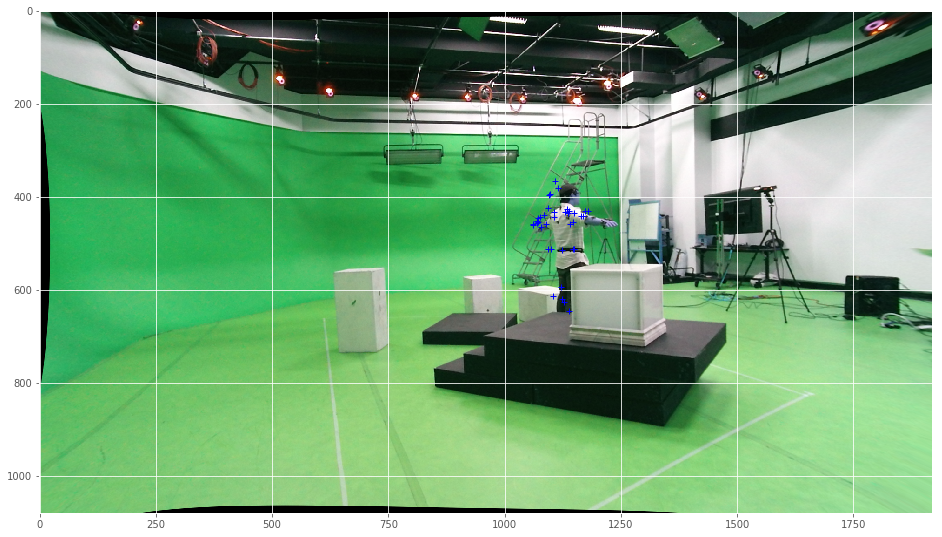

In [158]:
t_v = 3160
proj_pts = cam_dict[cam].project_linear(skel_curv[t_v, :, :].T.astype(np.float64))
fig = plt.figure(figsize=(16,12))
ax = plt.subplot(111)
show_proj_on_img(ax, linear_img, proj_pts)

In [140]:
a = skel_curv[t_v, :, :]
a[np.isnan(a)] = 0.0

In [135]:
a.dtype

dtype('float64')

In [161]:
fname = "/home/liyanc/Desktop/raid/scratch2/pose/processing/staging/20180831/camera3/liyan_action_00.MP4"
cap = cv2.VideoCapture(fname)

In [162]:
cap.get(cv2.CAP_PROP_FRAME_COUNT)

5145.0

In [165]:
cap.get(cv2.CAP_PROP_POS_FRAMES)

1.0

In [187]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 1)

True

In [188]:
ret, frame = cap.read()
ret, cap.get(cv2.CAP_PROP_POS_MSEC),

(True, 66.73333333333333)

In [189]:
cap.get(cv2.CAP_PROP_POS_FRAMES)

2.0

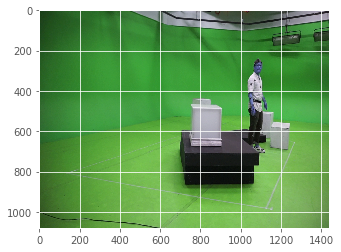

In [185]:
plt.imshow(frame)

In [2]:
import csv
from collections import defaultdict

In [39]:
rt_path = "/home/liyanc/Desktop/raid/scratch2/pose/processing/staging/BVHmat/"
subj_take_table = defaultdict(dict)
ptn = re.compile("(action_\d{2})|(motion_\d{2})|(zw_static_\d{2})")

csv_fname = "{:}/discarded_frames.csv".format(rt_path)
with open(csv_fname) as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row[1]) > 1 and ptn.search(row[1]) is not None:
            _, fname, is_test, is_discarded, start, end = row[:6]
            if is_discarded == "FALSE":
                sub = fname.split("_")[0]
                take = ptn.search(fname).group(0)
                sub = "deying" if sub == "deyingi" else sub

                remove_list = []
                for pair in row[6:]:
                    try:
                        b, e = pair.split("-")
                    except ValueError:
                        pass
                    else:
                        b, e = int(b), int(e)
                        remove_list.append((b, e))
                subj_take_table[sub][take] = {
                    "is_test": is_test == "TRUE", "is_discarded": is_discarded == "TRUE", "start": int(start.replace(",", "")), 
                    "end": int(end.replace(",", "")) if len(end) > 1 else None, "remove": remove_list}

for f in glob.glob("{:}/*.mat".format(rt_path)):
    fname = os.path.basename(f)
    sub = fname.split("_")[0]
    take = ptn.search(fname).group(0)
    sub = "deying" if sub == "deyingi" else sub
    try:
        subj_take_table[sub][take]["file"] = f
    except KeyError:
        pass

In [40]:
subj_take_table["lisi"]["action_01"]

{'end': 18349,
 'file': '/home/liyanc/Desktop/raid/scratch2/pose/processing/staging/BVHmat/lisi_action_01_refine_2.mat',
 'is_discarded': False,
 'is_test': False,
 'remove': [],
 'start': 1631}

In [35]:
int("20,614".replace(",", ""))

20614

In [34]:
"20,614".replace(",", "")

'20614'

In [51]:
import scipy.io as sio
joints = sio.loadmat(subj_take_table["lisi"]["action_01"]["file"])["xyz_c"].astype(np.float64)

In [59]:
start = 1631
pre_pad = np.zeros((start, 34, 3), dtype=np.float64) - np.nan
adj_joints = np.concatenate((pre_pad, joints))

In [65]:
rem_list = [(4456, 5432), (6874, 7869)]
for b, e in rem_list:
    adj_joints[b:(e + 1), :, :] = np.nan

In [67]:
adj_joints[4455]

array([[71.9468    , 35.5681    , 15.2283    ],
       [73.22827641, 37.61006544, 16.29562716],
       [73.77205508, 40.45440674, 16.70685381],
       [74.1295523 , 43.35182747, 16.88642813],
       [73.88345775, 46.25656038, 16.64755014],
       [71.88053574, 53.7082866 , 15.86452228],
       [70.83020385, 57.5628346 , 15.40221104],
       [70.54774634, 64.31523223, 15.12832983],
       [71.86946642, 51.87751119, 14.65384327],
       [73.1090657 , 49.66876273,  9.83081462],
       [79.17255665, 41.26043496,  8.65212419],
       [78.35927599, 32.9214591 ,  8.53931999],
       [78.92311623, 30.5483013 ,  8.71193558],
       [79.48695647, 28.1751435 ,  8.88455118],
       [78.10888538, 31.98204535, 10.29839663],
       [78.2745619 , 29.63637934, 10.96922351],
       [71.01625401, 51.86053399, 16.67472731],
       [68.98428353, 50.9074308 , 21.63854357],
       [64.16147059, 42.20969744, 24.79213188],
       [61.87826979, 50.20906366, 23.78724247],
       [61.09907002, 51.63349469, 21.958